In [31]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import scipy.optimize as sop
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')

mosprime3m = pd.read_csv('mosprime3m.csv',header=None,
                         index_col=0, names=['r3m'])['r3m'].sort_index()
mosprime3m_between = pd.read_csv('mosprime3m_between.csv', header=None,
                                 index_col=0, names=['r3m'])['r3m'].sort_index()
mosprime3m_short = pd.read_csv('mosprime3m_short.csv', header=None,
                               index_col=0, names=['r3m'])['r3m'].sort_index()

In [32]:
def HW1_p_cst(data, opt, num_paths=10, alpha=0.7, title='Calibrated HW1 Short Rate Simulation'):
    for i in range(num_paths):
        plt.plot(HW1_path_cst(data[0], len(data), opt[0], opt[1],
                      opt[2]), lw=0.8, alpha=alpha)
    plt.title(title)
    plt.plot(data.values.flatten(), label = 'data')
    plt.legend()
    plt.tight_layout
    plt.show()
       
def HW1_ml_final_diff_cst(p0, penalty=np.inf):
    theta, a, vol = p0
    if vol < 0.0:
        return penalty 
    x = data
    dx = np.diff(data)
    dt = np.array([1/252]*len(dx))
    sigma1 = vol * np.sqrt((1-np.exp(-2 * a * dt))/(2 * a))
    sigma = np.sqrt (vol ** 2 * dt + (sigma1 * a * dt) ** 2) 
    mu1 = data[:-1] * np.exp(-a * dt) + (theta / a) * (1 - np.exp(-a * dt)) 
    mu = (theta - a * mu1)*dt
    const = -1/2 * len(dx) * np.log(2 * np.pi)
    sum1 = - np.sum(np.log(sigma))
    sum2 = - np.sum(((dx-mu)/(np.sqrt(2) * sigma))**2)
    L = - (const + sum1 + sum2)
    return L

In [33]:
def HW1_ml_final_diff_cst_vol(p0, penalty=np.inf):
    vol = p0
    if vol < 0.0:
        return penalty 
    x = data
    dx = np.diff(data)
    dt = np.array([1/252]*len(dx))
    sigma1 = vol * np.sqrt((1-np.exp(-2 * alpha * dt))/(2 * alpha))
    sigma = np.sqrt (vol ** 2 * dt + (sigma1 * alpha * dt) ** 2) 
    mu1 = data[:-1] * np.exp(-alpha * dt) + (theta / alpha) * (1 - np.exp(-alpha * dt)) 
    mu = (theta - alpha * mu1)*dt
    const = -1/2 * len(dx) * np.log(2 * np.pi)
    sum1 = - np.sum(np.log(sigma))
    sum2 = - np.sum(((dx-mu)/(np.sqrt(2) * sigma))**2)
    L = - (const + sum1 + sum2)
    return L

In [4]:
data = mosprime3m_short

In [5]:
x = data.values
dx = np.diff(data.values)
dt = np.array([1/252]*len(dx))

In [6]:
Y = dx/dt[0]
X = np.array(x[1:])
X = sm.add_constant(X)

In [7]:
model = sm.OLS(Y, X).fit()

In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                   0.03848
Date:                Mon, 30 Apr 2018   Prob (F-statistic):              0.845
Time:                        17:26:16   Log-Likelihood:                -370.02
No. Observations:                 104   AIC:                             744.0
Df Residuals:                     102   BIC:                             749.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5198     28.242     -0.160      0.873     -60.539      51.499
x1             0.7845      3.999      0.196      0.845      -7.148       8.717
==============================================================================
Omnibus:                       43.302   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.408
Skew:                           1.252   Prob(JB):                     1.84e-44
Kurtosis:                       9.341   Cond. No.                         242.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
Y1 = x[1:]
X1 = np.array(x[:-1])
X1 = sm.add_constant(X1)

In [10]:
model1 = sm.OLS(Y1, X1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     3946.
Date:                Mon, 30 Apr 2018   Prob (F-statistic):           2.37e-83
Time:                        17:26:19   Log-Likelihood:                 206.04
No. Observations:                 104   AIC:                            -408.1
Df Residuals:                     102   BIC:                            -402.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1603      0.110      1.459      0.148      -0.058       0.378
x1             0.9778      0.016     62.813      0.000       0.947       1.009
==============================================================================
Omnibus:                       43.052   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.831
Skew:                           1.274   Prob(JB):                     2.69e-41
Kurtosis:                       9.052   Cond. No.                         239.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
model1.params

array([0.16034167, 0.97784353])

In [12]:
alpha = (model1.params[1]**(-1)-1)/dt[0]
theta = (model1.params[0]/dt[0])*(1+ alpha*dt[0])
print(alpha,theta)

5.70994142374348 41.321643266877324


In [13]:
def rolling_HW1_cst(db=mosprime3m, periods=21):
    date_start_end = (pd.date_range(end = db.index.min(), periods=1, freq='d') + periods - 1).strftime('%Y-%m-%d')[0]
    #end_dates = pd.date_range(start=date_start_end, end = db.index.max(), freq='d').strftime('%Y-%m-%d')
    #end_dates = [i for i in end_dates if i in db.index]
    df_cal_HW1_cst = pd.DataFrame(columns=["theta", "alpha", "vol", "mean", "std"], index=np.array(db.index[periods:]))
    for i in tqdm(range(len(df_cal_HW1_cst))):
        global data
        data = db.dropna().values[i:(periods+i)]
        x = data
        dx = np.diff(data)
        dt = np.array([1/252]*len(dx))
        Y1 = x[1:]
        X1 = np.array(x[:-1])
        X1 = sm.add_constant(X1)
        model_i = sm.OLS(Y1, X1).fit()
        mean = np.mean(x)
        std = np.std(x)
        global alpha, theta
        alpha = (model_i.params[1]**(-1)-1)/dt[0]
        theta = (model_i.params[0]/dt[0])*(1+ alpha*dt[0])            
        vol = sop.fmin(HW1_ml_final_diff_cst_vol, [0.2],
                       maxiter=1000, maxfun=1000, xtol=0.0001, ftol=0.0001, disp=0)
        df_cal_HW1_cst.iloc[i] = np.array([theta, alpha, vol, mean, std])
        #df_cal_HW1_cst.loc[i] = model_i.params
    return df_cal_HW1_cst

In [14]:
db252_HW1 = rolling_HW1_cst(periods=252)

100%|██████████| 2469/2469 [00:11<00:00, 220.12it/s]


In [17]:
db252_HW1.head()

,theta,alpha,vol,mean,std
2008-01-10,3.99771,0.548366,1.09266,5.86115,0.943377
2008-01-11,5.13906,0.809642,1.1707,5.86258,0.943268
2008-01-14,5.46551,0.859935,1.16789,5.86377,0.9431
2008-01-15,5.29025,0.838401,1.16688,5.86544,0.942756
2008-01-16,5.11692,0.837835,1.17797,5.86627,0.942534


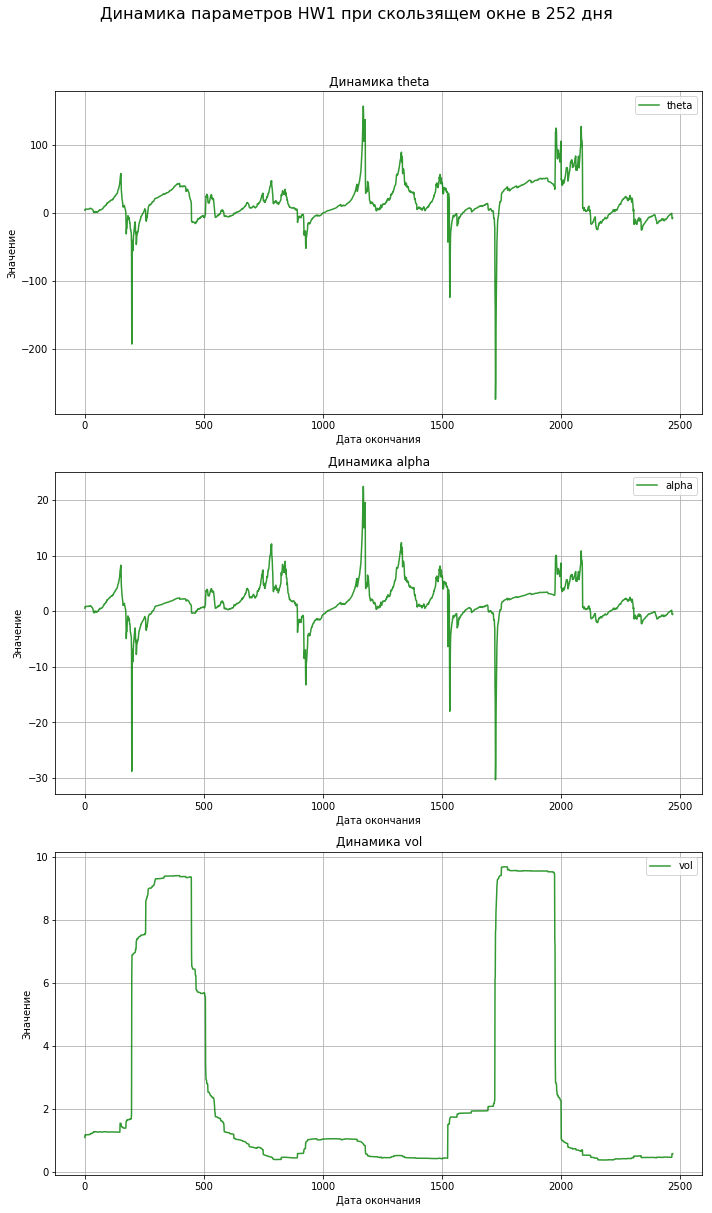

In [18]:
plt.figure(figsize=[10,16])
plt.subplot(3,1,1)
plt.plot(db252_HW1['theta'].values , 'g-',  alpha = 0.8, label = 'theta')
plt.title('Динамика theta')
plt.xlabel('Дата окончания') 
plt.ylabel('Значение')
plt.legend()
plt.grid()

plt.subplot(3,1,2)
plt.plot(db252_HW1['alpha'].values , 'g-',  alpha = 0.8, label = 'alpha')
plt.title('Динамика alpha')
plt.xlabel('Дата окончания') 
plt.ylabel('Значение')
plt.legend()
plt.grid()

plt.subplot(3,1,3)
plt.plot(db252_HW1['vol'].values , 'g-',  alpha = 0.8, label = 'vol')
plt.title('Динамика vol')
plt.xlabel('Дата окончания') 
plt.ylabel('Значение')
plt.legend()
plt.grid()


plt.suptitle('Динамика параметров HW1 при скользящем окне в 252 дня' , y=1.05, fontsize=16)
plt.tight_layout()
plt.show()

In [18]:
a = np.array(db252_HW1['alpha'].values, dtype=float)
l = np.array(db252_HW1['theta'].values, dtype=float)
vol = np.array(db252_HW1['vol'].values, dtype=float)
b = np.zeros(len(a))

In [19]:
x = mosprime3m.values[:-252]
t252 = np.array([252/252]*len(a))
sigma252 = vol * np.sqrt((1-np.exp(-2 * a * t252))/(2 * a))
mu252 = x * np.exp(-a * t252) + np.exp(-a * t252)*(l + b * t252)*(1 + np.exp(a * t252)*(-1 + a * t252))/(a**2)
t1 = np.array([1/252]*len(a))
sigma1 = vol * np.sqrt((1-np.exp(-2 * a * t1))/(2 * a))
mu1 = x * np.exp(-a * t1) + np.exp(-a * t1)*(l + b * t1)*(1 + np.exp(a * t1)*(-1 + a * t1))/(a**2)
t21 = np.array([21/252]*len(a))
sigma21 = vol * np.sqrt((1-np.exp(-2 * a * t21))/(2 * a))
mu21 = x * np.exp(-a * t21) + np.exp(-a * t21)*(l + b * t21)*(1 + np.exp(a * t21)*(-1 + a * t21))/(a**2)

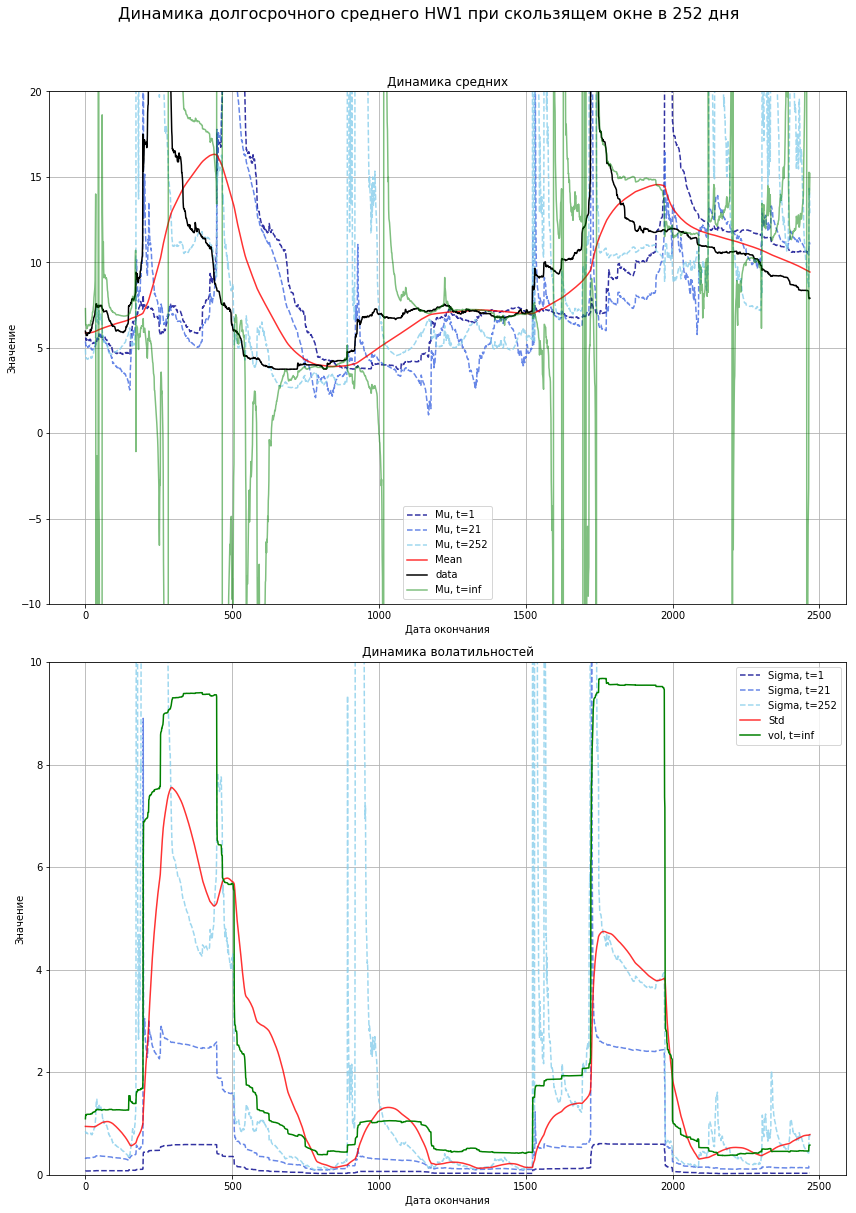

In [20]:
plt.figure(figsize=[12,16])

plt.subplot(2,1,1)
plt.plot(mu1 , '--', color='darkblue',  alpha = 0.8, label = 'Mu, t=1')
plt.plot(mu21 , '--', color='royalblue',  alpha = 0.8, label = 'Mu, t=21')
plt.plot(mu252 , '--', color='skyblue',  alpha = 0.8, label = 'Mu, t=252')
plt.plot(db252_HW1['mean'].values , 'r-',  alpha = 0.8, label = 'Mean')
plt.plot(mosprime3m.values[252:] , 'black', label = 'data')
plt.plot(l/a , 'g-',  alpha = 0.5, label = 'Mu, t=inf')
plt.title('Динамика средних')
plt.xlabel('Дата окончания') 
plt.ylabel('Значение')
plt.ylim([-10,20])
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.plot(sigma1 , '--', color='darkblue',  alpha = 0.8, label = 'Sigma, t=1')
plt.plot(sigma21 , '--', color='royalblue',  alpha = 0.8, label = 'Sigma, t=21')
plt.plot(sigma252 ,'--', color='skyblue',  alpha = 0.8, label = 'Sigma, t=252')
plt.plot(db252_HW1['std'].values , 'r-',  alpha = 0.8, label = 'Std')
plt.plot(db252_HW1['vol'].values , 'g-',  alpha = 1, label = 'vol, t=inf')
plt.title('Динамика волатильностей')
plt.xlabel('Дата окончания') 
plt.ylabel('Значение')
plt.ylim([0,10])
plt.legend()
plt.grid()

plt.suptitle('Динамика долгосрочного среднего HW1 при скользящем окне в 252 дня' , y=1.05, fontsize=16)
plt.tight_layout()
plt.show()

In [21]:
def HW1_ml_final_diff_cst2(p0, penalty=np.inf):
    theta, a, vol = p0
    if vol < 0.0:
        return penalty 
    x = data
    dx = np.diff(data)
    dt = np.array([1/252]*len(dx))
    sigma = vol*np.sqrt(dt) 
    mu = (theta - a * x[:-1])*dt
    const = -1/2 * len(dx) * np.log(2 * np.pi)
    sum1 = - np.sum(np.log(sigma))
    sum2 = - np.sum(((dx-mu)/(np.sqrt(2) * sigma))**2)
    L = - (const + sum1 + sum2)
    return L

def rolling_HW1_cst_df(db=mosprime3m, periods=21):
    date_start_end = (pd.date_range(end = db.index.min(), periods=1, freq='d') + periods - 1).strftime('%Y-%m-%d')[0]
    #end_dates = pd.date_range(start=date_start_end, end = db.index.max(), freq='d').strftime('%Y-%m-%d')
    #end_dates = [i for i in end_dates if i in db.index]
    df_cal_HW1_cst = pd.DataFrame(columns=["theta", "alpha", "vol", "mean", "std"], index=np.array(db.index[periods:]))
    for i in tqdm(range(len(df_cal_HW1_cst))):
        global data
        data = db.dropna().values[i:(periods+i)]
        x = data
        mean = np.mean(x)
        std = np.std(x)
        p4 = [mean, np.max(x)-np.min(x), std]#db252_HW1.values[i,:3]
        par = sop.fmin(HW1_ml_final_diff_cst2, p4,
                       maxiter=1000, maxfun=1000, xtol=0.0001, ftol=0.0001, disp=0)
        df_cal_HW1_cst.iloc[i] = np.append(par, [mean, std])
    return df_cal_HW1_cst

In [22]:
db252_HW1_df = rolling_HW1_cst_df(periods=252)

100%|██████████| 2469/2469 [00:34<00:00, 71.83it/s]


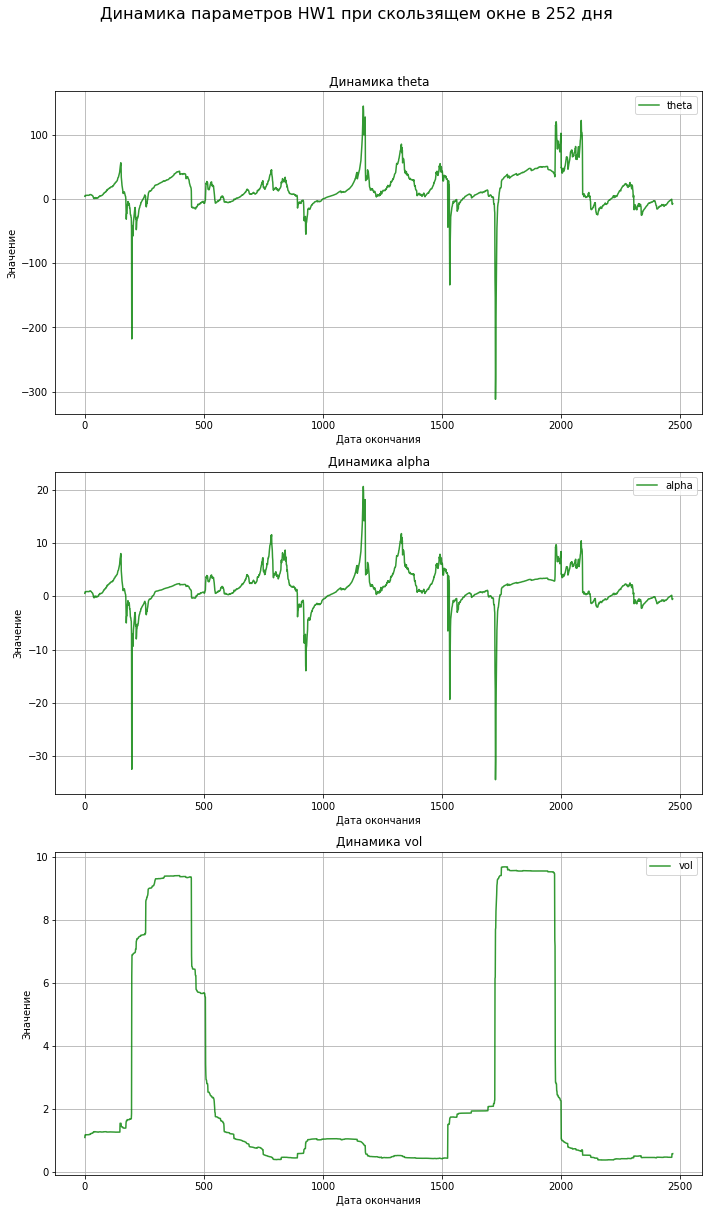

In [23]:
plt.figure(figsize=[10,16])
plt.subplot(3,1,1)
plt.plot(db252_HW1_df['theta'].values , 'g-',  alpha = 0.8, label = 'theta')
plt.title('Динамика theta')
plt.xlabel('Дата окончания') 
plt.ylabel('Значение')
#plt.ylim([-10,10])
plt.legend()
plt.grid()

plt.subplot(3,1,2)
plt.plot(db252_HW1_df['alpha'].values , 'g-',  alpha = 0.8, label = 'alpha')
plt.title('Динамика alpha')
plt.xlabel('Дата окончания') 
plt.ylabel('Значение')
plt.legend()
plt.grid()

plt.subplot(3,1,3)
plt.plot(db252_HW1_df['vol'].values , 'g-',  alpha = 0.8, label = 'vol')
plt.title('Динамика vol')
plt.xlabel('Дата окончания') 
plt.ylabel('Значение')
plt.legend()
plt.grid()


plt.suptitle('Динамика параметров HW1 при скользящем окне в 252 дня' , y=1.05, fontsize=16)
plt.tight_layout()
plt.show()

In [24]:
a = np.array(db252_HW1_df['alpha'].values, dtype=float)
l = np.array(db252_HW1_df['theta'].values, dtype=float)
vol = np.array(db252_HW1_df['vol'].values, dtype=float)
b = np.zeros(len(a))

In [25]:
x = mosprime3m.values[:-252]
t252 = np.array([252/252]*len(a))
sigma252 = vol * np.sqrt((1-np.exp(-2 * a * t252))/(2 * a))
mu252 = x * np.exp(-a * t252) + np.exp(-a * t252)*(l + b * t252)*(1 + np.exp(a * t252)*(-1 + a * t252))/(a**2)
t1 = np.array([1/252]*len(a))
sigma1 = vol * np.sqrt((1-np.exp(-2 * a * t1))/(2 * a))
mu1 = x * np.exp(-a * t1) + np.exp(-a * t1)*(l + b * t1)*(1 + np.exp(a * t1)*(-1 + a * t1))/(a**2)
t21 = np.array([21/252]*len(a))
sigma21 = vol * np.sqrt((1-np.exp(-2 * a * t21))/(2 * a))
mu21 = x * np.exp(-a * t21) + np.exp(-a * t21)*(l + b * t21)*(1 + np.exp(a * t21)*(-1 + a * t21))/(a**2)

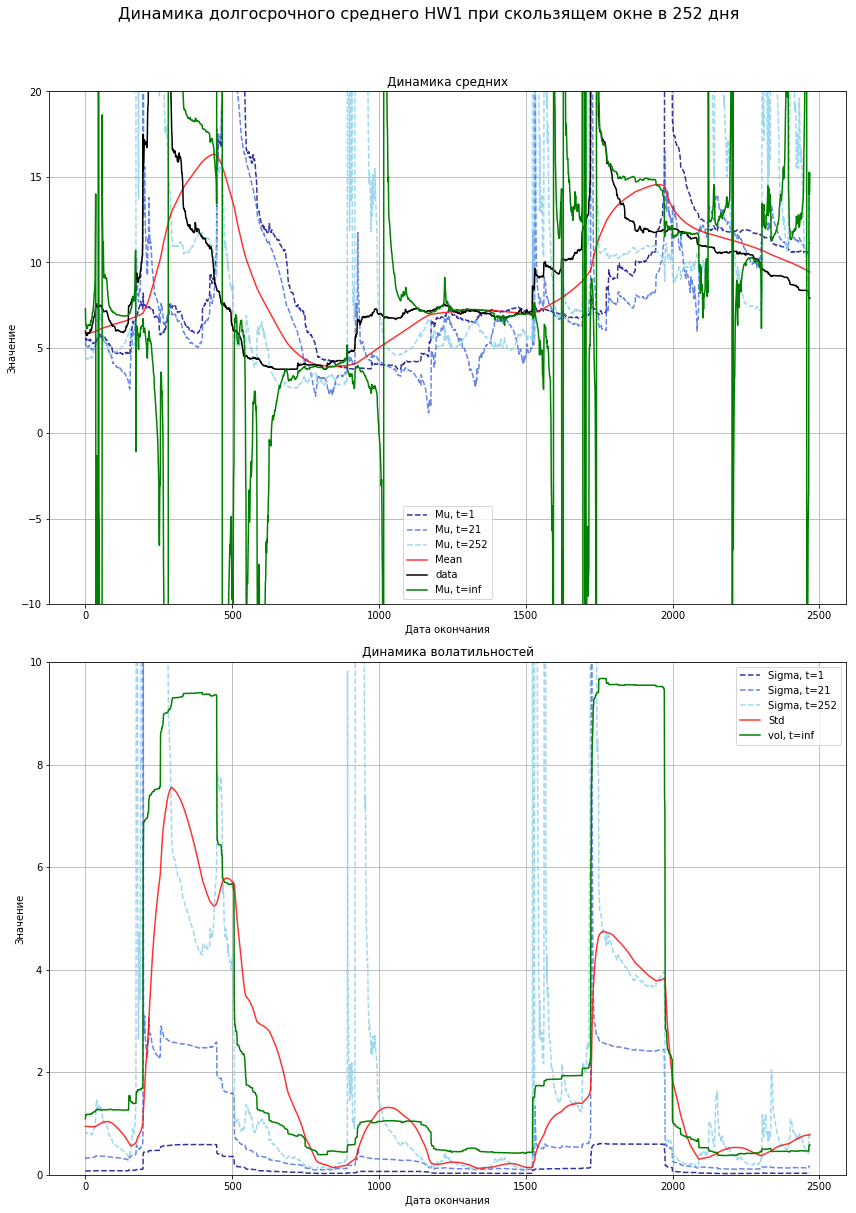

In [26]:
plt.figure(figsize=[12,16])

plt.subplot(2,1,1)
plt.plot(mu1 , '--', color='darkblue',  alpha = 0.8, label = 'Mu, t=1')
plt.plot(mu21 , '--', color='royalblue',  alpha = 0.8, label = 'Mu, t=21')
plt.plot(mu252 , '--', color='skyblue',  alpha = 0.8, label = 'Mu, t=252')
plt.plot(db252_HW1['mean'].values , 'r-',  alpha = 0.8, label = 'Mean')
plt.plot(mosprime3m.values[252:] , 'black', label = 'data')
plt.plot(l/a , 'g-',  alpha = 1, label = 'Mu, t=inf')
plt.title('Динамика средних')
plt.xlabel('Дата окончания') 
plt.ylabel('Значение')
plt.ylim([-10,20])
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.plot(sigma1 , '--', color='darkblue',  alpha = 0.8, label = 'Sigma, t=1')
plt.plot(sigma21 , '--', color='royalblue',  alpha = 0.8, label = 'Sigma, t=21')
plt.plot(sigma252 ,'--', color='skyblue',  alpha = 0.8, label = 'Sigma, t=252')
plt.plot(db252_HW1['std'].values , 'r-',  alpha = 0.8, label = 'Std')
plt.plot(db252_HW1['vol'].values , 'g-',  alpha = 1, label = 'vol, t=inf')
plt.title('Динамика волатильностей')
plt.xlabel('Дата окончания') 
plt.ylabel('Значение')
plt.ylim([0,10])
plt.legend()
plt.grid()

plt.suptitle('Динамика долгосрочного среднего HW1 при скользящем окне в 252 дня' , y=1.05, fontsize=16)
plt.tight_layout()
plt.show()

In [27]:
def rolling_HW1_cst_df_2(db=mosprime3m, periods=21):
    date_start_end = (pd.date_range(end = db.index.min(), periods=1, freq='d') + periods - 1).strftime('%Y-%m-%d')[0]
    #end_dates = pd.date_range(start=date_start_end, end = db.index.max(), freq='d').strftime('%Y-%m-%d')
    #end_dates = [i for i in end_dates if i in db.index]
    df_cal_HW1_cst = pd.DataFrame(columns=["theta", "alpha", "vol", "mean", "std"], index=np.array(db.index[periods:]))
    alpha =np.mean(db.dropna().values)
    for i in tqdm(range(len(df_cal_HW1_cst))):
        global data
        data = db.dropna().values[i:(periods+i)]
        x = data
        mean = np.mean(x)
        std = np.std(x)
        p4 = [mean, np.max(x)-np.min(x), std]#db252_HW1.values[i,:3]
        par = sop.minimize(HW1_ml_final_diff_cst2, p4, method='Powell').x
        df_cal_HW1_cst.iloc[i] = np.append(par, [mean, std])
    return df_cal_HW1_cst

In [28]:
db252_HW1_df_2 = rolling_HW1_cst_df_2(periods=252)

100%|██████████| 2469/2469 [00:23<00:00, 105.44it/s]


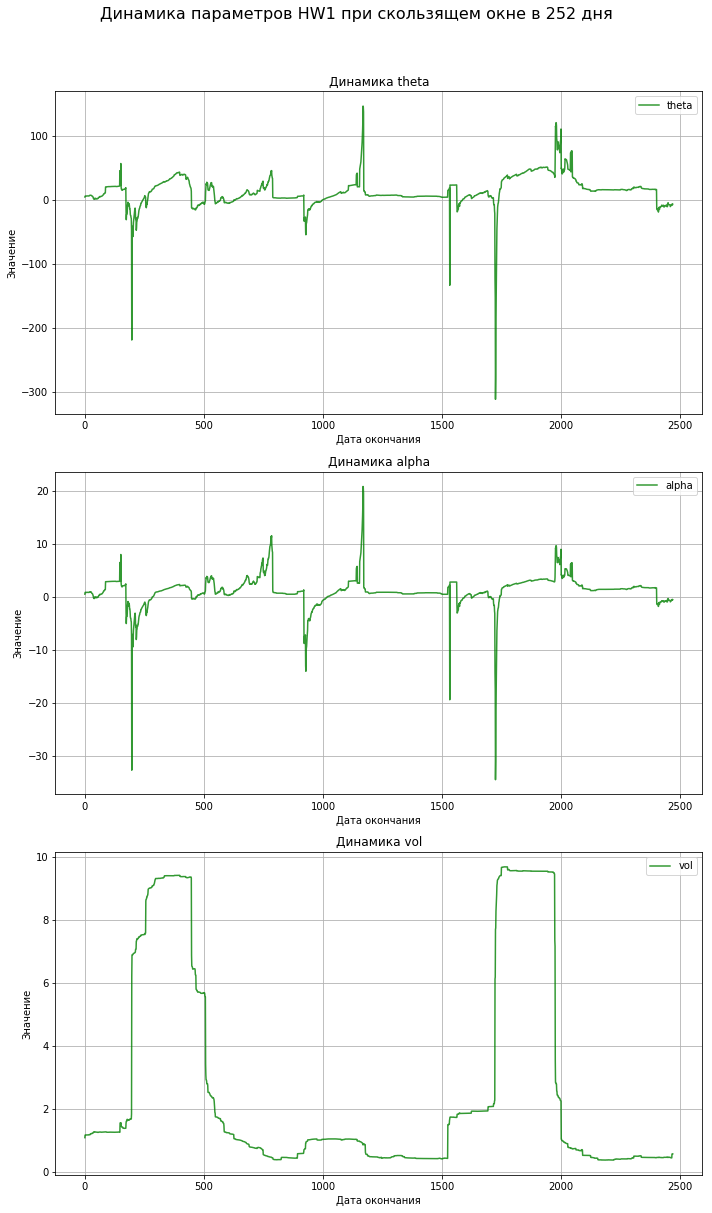

In [29]:
plt.figure(figsize=[10,16])
plt.subplot(3,1,1)
plt.plot(db252_HW1_df_2['theta'].values , 'g-',  alpha = 0.8, label = 'theta')
plt.title('Динамика theta')
plt.xlabel('Дата окончания') 
plt.ylabel('Значение')
#plt.ylim([-10,10])
plt.legend()
plt.grid()

plt.subplot(3,1,2)
plt.plot(db252_HW1_df_2['alpha'].values , 'g-',  alpha = 0.8, label = 'alpha')
plt.title('Динамика alpha')
plt.xlabel('Дата окончания') 
plt.ylabel('Значение')
plt.legend()
plt.grid()

plt.subplot(3,1,3)
plt.plot(db252_HW1_df_2['vol'].values , 'g-',  alpha = 0.8, label = 'vol')
plt.title('Динамика vol')
plt.xlabel('Дата окончания') 
plt.ylabel('Значение')
plt.legend()
plt.grid()


plt.suptitle('Динамика параметров HW1 при скользящем окне в 252 дня' , y=1.05, fontsize=16)
plt.tight_layout()
plt.show()

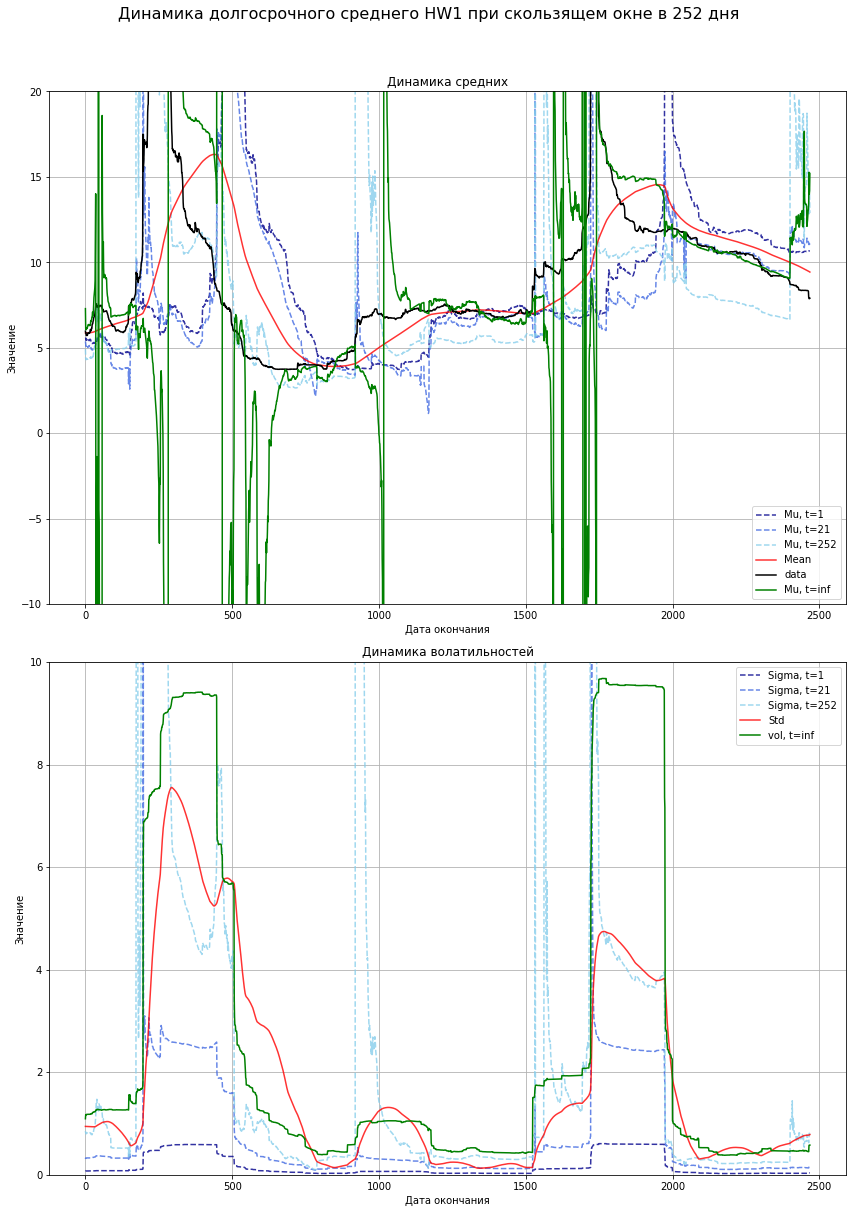

In [30]:
a = np.array(db252_HW1_df_2['alpha'].values, dtype=float)
l = np.array(db252_HW1_df_2['theta'].values, dtype=float)
vol = np.array(db252_HW1_df_2['vol'].values, dtype=float)
b = np.zeros(len(a))

x = mosprime3m.values[:-252]
t252 = np.array([252/252]*len(a))
sigma252 = vol * np.sqrt((1-np.exp(-2 * a * t252))/(2 * a))
mu252 = x * np.exp(-a * t252) + np.exp(-a * t252)*(l + b * t252)*(1 + np.exp(a * t252)*(-1 + a * t252))/(a**2)
t1 = np.array([1/252]*len(a))
sigma1 = vol * np.sqrt((1-np.exp(-2 * a * t1))/(2 * a))
mu1 = x * np.exp(-a * t1) + np.exp(-a * t1)*(l + b * t1)*(1 + np.exp(a * t1)*(-1 + a * t1))/(a**2)
t21 = np.array([21/252]*len(a))
sigma21 = vol * np.sqrt((1-np.exp(-2 * a * t21))/(2 * a))
mu21 = x * np.exp(-a * t21) + np.exp(-a * t21)*(l + b * t21)*(1 + np.exp(a * t21)*(-1 + a * t21))/(a**2)

plt.figure(figsize=[12,16])

plt.subplot(2,1,1)
plt.plot(mu1 , '--', color='darkblue',  alpha = 0.8, label = 'Mu, t=1')
plt.plot(mu21 , '--', color='royalblue',  alpha = 0.8, label = 'Mu, t=21')
plt.plot(mu252 , '--', color='skyblue',  alpha = 0.8, label = 'Mu, t=252')
plt.plot(db252_HW1['mean'].values , 'r-',  alpha = 0.8, label = 'Mean')
plt.plot(mosprime3m.values[252:] , 'black', label = 'data')
plt.plot(l/a , 'g-',  alpha = 1, label = 'Mu, t=inf')
plt.title('Динамика средних')
plt.xlabel('Дата окончания') 
plt.ylabel('Значение')
plt.ylim([-10,20])
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.plot(sigma1 , '--', color='darkblue',  alpha = 0.8, label = 'Sigma, t=1')
plt.plot(sigma21 , '--', color='royalblue',  alpha = 0.8, label = 'Sigma, t=21')
plt.plot(sigma252 ,'--', color='skyblue',  alpha = 0.8, label = 'Sigma, t=252')
plt.plot(db252_HW1_df_2['std'].values , 'r-',  alpha = 0.8, label = 'Std')
plt.plot(db252_HW1_df_2['vol'].values , 'g-',  alpha = 1, label = 'vol, t=inf')
plt.title('Динамика волатильностей')
plt.xlabel('Дата окончания') 
plt.ylabel('Значение')
plt.ylim([0,10])
plt.legend()
plt.grid()

plt.suptitle('Динамика долгосрочного среднего HW1 при скользящем окне в 252 дня' , y=1.05, fontsize=16)
plt.tight_layout()
plt.show()

In [149]:
def rolling_HW1_cst_df_2(db=mosprime3m, periods=21):
    date_start_end = (pd.date_range(end = db.index.min(), periods=1, freq='d') + periods - 1).strftime('%Y-%m-%d')[0]
    #end_dates = pd.date_range(start=date_start_end, end = db.index.max(), freq='d').strftime('%Y-%m-%d')
    #end_dates = [i for i in end_dates if i in db.index]
    df_cal_HW1_cst = pd.DataFrame(columns=["theta", "alpha", "vol", "mean", "std"], index=np.array(db.index[periods:]))
    alpha =np.mean(db.dropna().values)
    for i in tqdm(range(len(df_cal_HW1_cst))):
        global data
        data = db.dropna().values[i:(periods+i)]
        x = data
        mean = np.mean(x)
        std = np.std(x)
        p4 = [mean, np.max(x)-np.min(x), std]#db252_HW1.values[i,:3]
        par = sop.minimize(HW1_ml_final_diff_cst, p4, method='Powell').x
        df_cal_HW1_cst.iloc[i] = np.append(par, [mean, std])
    return df_cal_HW1_cst

In [150]:
db252_HW1_df_3 = rolling_HW1_cst_df_2(periods=252)

100%|██████████| 2469/2469 [00:36<00:00, 66.77it/s]


In [151]:
 db252_HW1.head(), db252_HW1_df.head(), db252_HW1_df_2.head(), db252_HW1_df_3.head()

(              theta     alpha      vol     mean       std
 2008-01-10  3.99771  0.548366  1.09266  5.86115  0.943377
 2008-01-11  5.13906  0.809642   1.1707  5.86258  0.943268
 2008-01-14  5.46551  0.859935  1.16789  5.86377    0.9431
 2008-01-15  5.29025  0.838401  1.16688  5.86544  0.942756
 2008-01-16  5.11692  0.837835  1.17797  5.86627  0.942534,
               theta     alpha      vol     mean       std
 2008-01-10  -3.8543 -0.791074  1.08994  5.86115  0.943377
 2008-01-11  -3.8901 -0.730195  1.16859  5.86258  0.943268
 2008-01-14  -3.5303  -0.67378  1.16597  5.86377    0.9431
 2008-01-15 -3.69742  -0.69354  1.16493  5.86544  0.942756
 2008-01-16 -4.04763 -0.724043  1.17592  5.86627  0.942534,
               theta    alpha      vol     mean       std
 2008-01-10  17.1988  2.78992  1.10506  5.86115  0.943377
 2008-01-11  16.9086  2.79926  1.17946  5.86258  0.943268
 2008-01-14  16.9524  2.80148   1.1765  5.86377    0.9431
 2008-01-15  16.9037   2.8009  1.17562  5.86544  0.942756


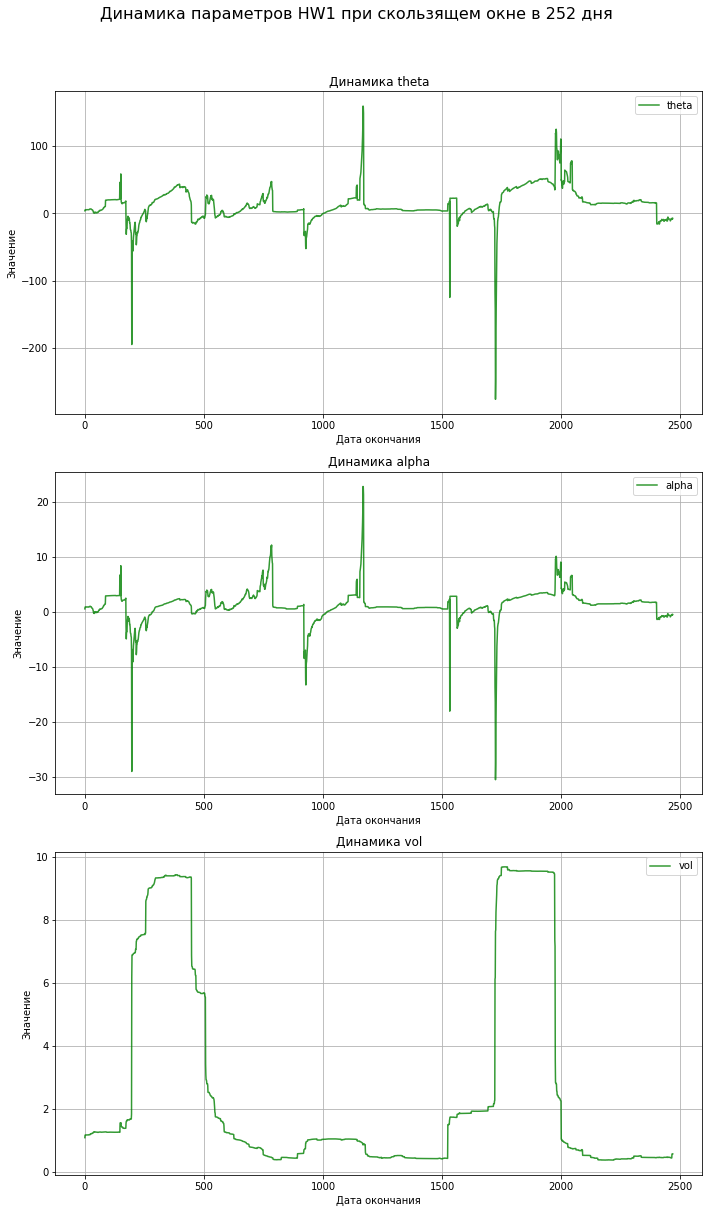

In [152]:
plt.figure(figsize=[10,16])
plt.subplot(3,1,1)
plt.plot(db252_HW1_df_3['theta'].values , 'g-',  alpha = 0.8, label = 'theta')
plt.title('Динамика theta')
plt.xlabel('Дата окончания') 
plt.ylabel('Значение')
#plt.ylim([-10,10])
plt.legend()
plt.grid()

plt.subplot(3,1,2)
plt.plot(db252_HW1_df_3['alpha'].values , 'g-',  alpha = 0.8, label = 'alpha')
plt.title('Динамика alpha')
plt.xlabel('Дата окончания') 
plt.ylabel('Значение')
plt.legend()
plt.grid()

plt.subplot(3,1,3)
plt.plot(db252_HW1_df_3['vol'].values , 'g-',  alpha = 0.8, label = 'vol')
plt.title('Динамика vol')
plt.xlabel('Дата окончания') 
plt.ylabel('Значение')
plt.legend()
plt.grid()


plt.suptitle('Динамика параметров HW1 при скользящем окне в 252 дня' , y=1.05, fontsize=16)
plt.tight_layout()
plt.show()

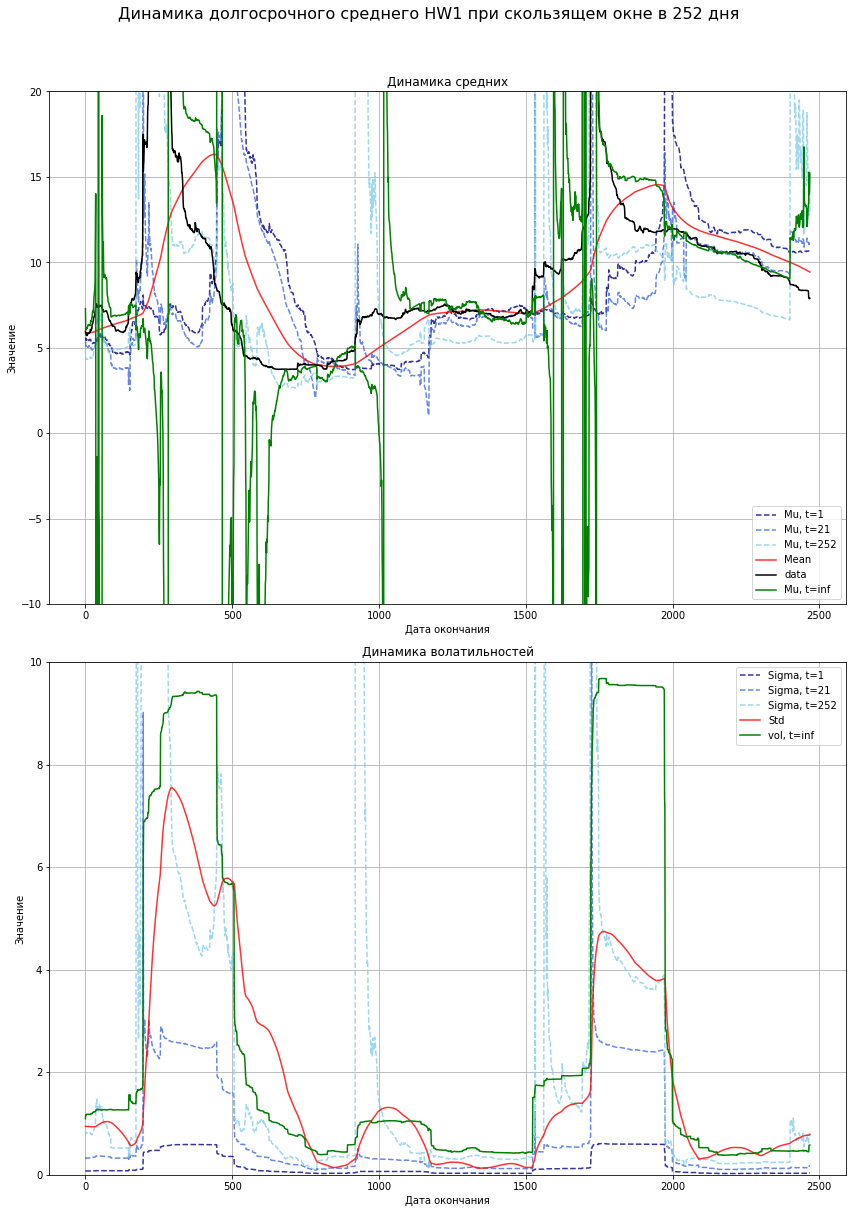

In [153]:
a = np.array(db252_HW1_df_3['alpha'].values, dtype=float)
l = np.array(db252_HW1_df_3['theta'].values, dtype=float)
vol = np.array(db252_HW1_df_3['vol'].values, dtype=float)
b = np.zeros(len(a))

x = mosprime3m.values[:-252]
t252 = np.array([252/252]*len(a))
sigma252 = vol * np.sqrt((1-np.exp(-2 * a * t252))/(2 * a))
mu252 = x * np.exp(-a * t252) + np.exp(-a * t252)*(l + b * t252)*(1 + np.exp(a * t252)*(-1 + a * t252))/(a**2)
t1 = np.array([1/252]*len(a))
sigma1 = vol * np.sqrt((1-np.exp(-2 * a * t1))/(2 * a))
mu1 = x * np.exp(-a * t1) + np.exp(-a * t1)*(l + b * t1)*(1 + np.exp(a * t1)*(-1 + a * t1))/(a**2)
t21 = np.array([21/252]*len(a))
sigma21 = vol * np.sqrt((1-np.exp(-2 * a * t21))/(2 * a))
mu21 = x * np.exp(-a * t21) + np.exp(-a * t21)*(l + b * t21)*(1 + np.exp(a * t21)*(-1 + a * t21))/(a**2)

plt.figure(figsize=[12,16])

plt.subplot(2,1,1)
plt.plot(mu1 , '--', color='darkblue',  alpha = 0.8, label = 'Mu, t=1')
plt.plot(mu21 , '--', color='royalblue',  alpha = 0.8, label = 'Mu, t=21')
plt.plot(mu252 , '--', color='skyblue',  alpha = 0.8, label = 'Mu, t=252')
plt.plot(db252_HW1_df_3['mean'].values , 'r-',  alpha = 0.8, label = 'Mean')
plt.plot(mosprime3m.values[252:] , 'black', label = 'data')
plt.plot(l/a , 'g-',  alpha = 1, label = 'Mu, t=inf')
plt.title('Динамика средних')
plt.xlabel('Дата окончания') 
plt.ylabel('Значение')
plt.ylim([-10,20])
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.plot(sigma1 , '--', color='darkblue',  alpha = 0.8, label = 'Sigma, t=1')
plt.plot(sigma21 , '--', color='royalblue',  alpha = 0.8, label = 'Sigma, t=21')
plt.plot(sigma252 ,'--', color='skyblue',  alpha = 0.8, label = 'Sigma, t=252')
plt.plot(db252_HW1_df_3['std'].values , 'r-',  alpha = 0.8, label = 'Std')
plt.plot(db252_HW1_df_3['vol'].values , 'g-',  alpha = 1, label = 'vol, t=inf')
plt.title('Динамика волатильностей')
plt.xlabel('Дата окончания') 
plt.ylabel('Значение')
plt.ylim([0,10])
plt.legend()
plt.grid()

plt.suptitle('Динамика долгосрочного среднего HW1 при скользящем окне в 252 дня' , y=1.05, fontsize=16)
plt.tight_layout()
plt.show()